# Application - Color Segmentation

The goal in color segmentation is to assign pixels that are roughly of the same color to the same segment.
In image segmentation, the main task is to decompose an image into multiple segements. 

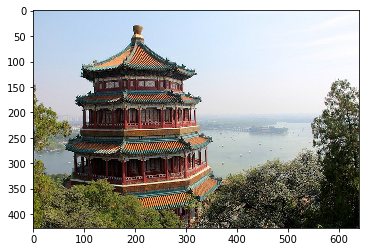

In [1]:
%matplotlib inline
from sklearn.datasets import load_sample_images
from matplotlib.image import imread
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


dataset = load_sample_images()
sample_image = dataset.images[0]
plt.imshow(sample_image)

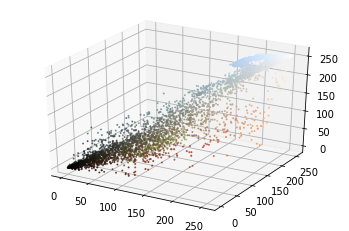

In [2]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D


# reshape the image to 3 features, for each respective RGB channel
X = sample_image.reshape(-1, 3)

# visualize a random sample of pixels
rand_row_idx = np.random.randint(X.shape[0], size=5000)
X_sample = X[rand_row_idx, :]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_sample[:, 0], X_sample[:, 1], X_sample[:, 2], c=list(X_sample/255.0), s=1)
plt.show()

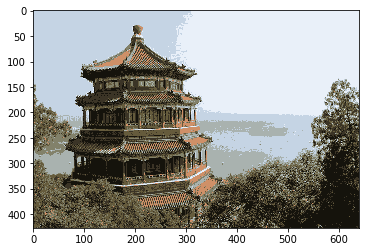

In [16]:
# cluster into 8 different clusters or colors
kmeans = KMeans(n_clusters=8).fit(X)

# at this point we can see what cluster each pixel is a part of
# what we want to be able to do is recreate the image where each pixel is
# newly assigned to the average color of it assigned cluster
# we acheive this by indexing on the cluster centers that is marked by the label
# 
# c1: [a1, b1, c1] <-- label index 0
# c2: [a2, b2, c2] <-- label index 1
# c3: [a3, b3, c3] <-- label index 2
# 
# ...
# c8: [a8, b8, c8] <-- label index 8
# 

segmented_X = kmeans.cluster_centers_.astype(int)[kmeans.labels_]
segmented_X = segmented_X.reshape(sample_image.shape)
plt.imshow(segmented_X)

Its pretty incredible the kind of detail we can get just from 8 different colors.